In [ ]:
pip install pythran

In [ ]:
import numpy as np
import math
import pandas as pd
import pythran
import matplotlib.pyplot as plt

In [ ]:
%load_ext pythran.magic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


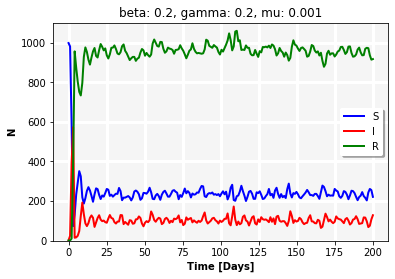

In [18]:
mu = 1/1000           # 1/80 = 0.125

def sir(u,parms,t):
    
    bet,gamm,iota,N,dt=parms
    S,I,R,Y=u
    lambd = bet*((I * S))/N
    #h = max(lambd, 100)
    ifrac = 1.0 - math.exp(-(lambd)*dt)
    #g = min(ifrac, 0.9)
    rfrac = 1.0 - math.exp(-gamm*(I)*dt)
    infection = np.random.binomial(S,ifrac)
    recovery = np.random.binomial(I,rfrac)
    Sdfrac = 1.0 - math.exp(-mu*S*dt)
    death_S = np.random.binomial(S, Sdfrac)
    Idfrac = 1.0 - math.exp(-mu*I*dt)
    death_I = np.random.binomial(I, Idfrac)
    Rdfrac = 1.0 - math.exp(-mu*R*dt)
    death_R = np.random.binomial(R, Rdfrac)
    Bfrac = 1.0 - math.exp(-mu*N*dt)
    birth_N = np.random.binomial(N, Bfrac)
    plt.title("beta: " + str(bet) + ", gamma: " + str(gamm) + ", mu: " + str(round(mu, 5)))
    return [S-infection-death_S+birth_N,I+infection-recovery-death_I,R+recovery-death_R,Y+infection]

def simulate():
    parms = [10/50, 1/5, 0.01, 1000.0, 0.1]
    tf = 200
    tl = 200
    t = np.linspace(0,tf,tl)
    S = np.zeros(tl)
    I = np.zeros(tl)
    R = np.zeros(tl)
    Y = np.zeros(tl)
    u = [999,1,0,0]
    S[0],I[0],R[0],Y[0] = u
    for j in range(1,tl):
        u = sir(u,parms,t[j])
        S[j],I[j],R[j],Y[j] = u
    return {'t':t,'S':S,'I':I,'R':R,'Y':Y}

sir_out = pd.DataFrame(simulate())

sline = plt.plot("t","S","",data=sir_out,color="blue",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="red",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="green",linewidth=2)

plt.ylim([0,1100])
#plt.xlim([0,50])

#fig = plt.figure(facecolor = 'w')
plt.xlabel("Time [Days]",fontweight="bold")
plt.ylabel("N",fontweight="bold")
legend = plt.legend(loc='best', shadow='true')

#ax = fig.add_subplot(111, axisbelow=True)

plt.grid(color='w', linewidth=3)
ax = plt.axes()
ax.set_facecolor('whitesmoke')

frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)